<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/Basic_Heatmap_24H_%25Change.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **HEATMAP 24H change %**


To create a heatmap showing the percentage changes in the assets mentioned over the last 24 hours, we're going to use several Python libraries such as pandas, yfinance, and seaborn. Here are the steps to follow:

Install the necessary libraries: If you haven't already installed them, you can install them using pip.

In [1]:
pip install pandas yfinance seaborn matplotlib


**Download financial data:** Use yfinance to retrieve asset data.

**Calculate percentage changes:** Compare the current price with the price 24 hours ago.

**Create the heatmap:** Use seaborn to visualise the variations.

*Here is a Python script that does this:*

[*********************100%%**********************]  16 of 16 completed


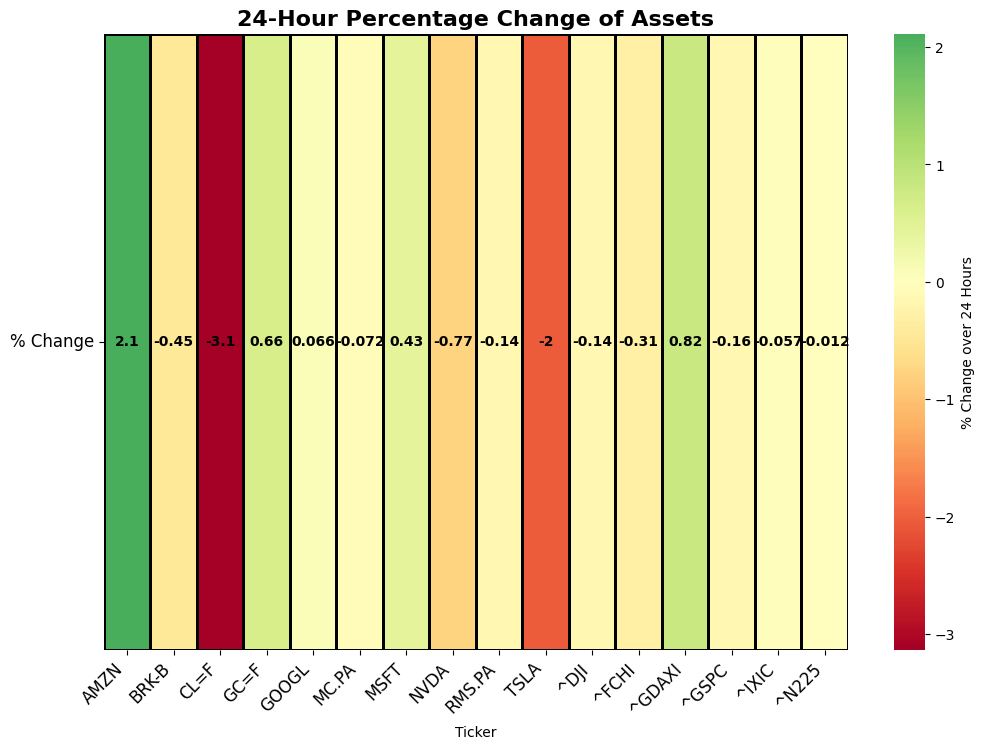

In [4]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

# Liste des symboles des actifs
tickers = [
    "GC=F", "CL=F", "^IXIC", "^GSPC", "^DJI", "^GDAXI", "^FCHI", "^N225",
    "NVDA", "AMZN", "TSLA", "MC.PA", "RMS.PA", "BRK-B", "GOOGL", "MSFT"
]

# Télécharger les données des 5 derniers jours pour chaque actif
data = yf.download(tickers, period="5d", interval="1d")

# Vérifier que les données ont été téléchargées correctement
if data.empty:
    raise ValueError("Les données n'ont pas pu être téléchargées. Veuillez vérifier les symboles des actifs.")

# Extraire les prix de clôture
close_prices = data['Close']

# Vérifier que nous avons assez de données
if close_prices.shape[0] < 2:
    raise ValueError("Pas assez de données pour calculer les variations sur 24 heures.")

# Calculer la variation en pourcentage sur 24 heures
returns = (close_prices.iloc[-1] - close_prices.iloc[-2]) / close_prices.iloc[-2] * 100

# Créer un DataFrame avec les résultats
returns_df = pd.DataFrame(returns, columns=["% Change"])

# Créer la heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(
    returns_df.T,
    annot=True,
    cmap='RdYlGn',
    center=0,
    cbar_kws={'label': '% Change over 24 Hours'},
    linewidths=1,
    linecolor='black',
    annot_kws={'color': 'black', 'weight': 'bold', 'size': 10}
)

# Rotation des étiquettes pour les rendre lisibles
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.title('24-Hour Percentage Change of Assets', fontsize=16, weight='bold')
plt.show()
